### Data preparing

In [1]:
plt.style.use('bmh')

df = pd.read_csv('data/aave_v3_ethereum.csv')

# df['day_start'] = pd.to_datetime(df['day_start'].str[:10])
# df['report_month'] = pd.to_datetime(df['report_month'].str[:10])
df['start_month'] = df['day_start'].str[:7]
df['report_month'] = df['report_month'].str[:7]

# feature engineering
df['current_supply_perc'] = df.groupby('user').current_supply.apply(lambda x: x / (x.iloc[0] + 0.001))
df['current_borrow_perc'] = df.groupby('user').current_supply.apply(lambda x: x / (x.iloc[0] + 0.001))
df['report_num'] = df.groupby('user').report_month.cumcount() + 1

bins = [-np.inf, 0, 10, 1000, 10000, 100000, np.inf]
labs = ['0)0$', '1)0-10$', '2)10-1K$', '3)1K-10K$', '4)10K-100K$', '5)100K$+']
df['current_supply_cat'] = pd.cut(df['current_supply'], bins, labels = labs).astype(str)
df['amt_supply_cat'] = pd.cut(df['amt_supply'], bins, labels = labs).astype(str)

df['cnt_trnx'] = df[['cnt_supply','cnt_withdraw','cnt_borrow','cnt_repay']].sum(axis = 1)

df['current_borrow_flg'] = (df['current_borrow'] > 0).astype(int)
df['current_supply_flg'] = (df['current_supply'] > 0).astype(int)

df['amt_borrow_flg'] = (df['amt_borrow'] > 0).astype(int)
df['amt_supply_flg'] = (df['amt_supply'] > 0).astype(int)

print(df.shape)
df[-5:]

(36940, 33)


,user,day_start,report_month,cnt_tokens,cnt_tokens_supply,cnt_tokens_borrow,cnt_supply,cnt_withdraw,cnt_liquidate_supply,cnt_borrow,cnt_repay,cnt_liquidate_borrow,amt_supply,amt_withdraw,amt_liquidate_supply,amt_borrow,amt_repay,amt_liquidate_borrow,current_supply,current_borrow,interest_supply,interest_borrow,start_month,current_supply_perc,current_borrow_perc,report_num,current_supply_cat,amt_supply_cat,cnt_trnx,current_borrow_flg,current_supply_flg,amt_borrow_flg,amt_supply_flg
36935,0xfff95fbe9f34bdeff54de0c7088bb3376a446caf,2023-03-19 00:00:00.000 UTC,2023-03,1,1,0,1,0,0,0,0,0,1.09,0.00,0.00,0.00,0.00,0.00,1.09,0.00,0.00,0.00,2023-03,1.00,1.00,1,1)0-10$,1)0-10$,1,0,1,0,1
36936,0xfff95fbe9f34bdeff54de0c7088bb3376a446caf,2023-03-19 00:00:00.000 UTC,2023-04,1,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1.14,0.00,0.00,0.00,2023-03,1.05,1.05,2,1)0-10$,0)0$,0,0,1,0,0
36937,0xfff95fbe9f34bdeff54de0c7088bb3376a446caf,2023-03-19 00:00:00.000 UTC,2023-05,1,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1.12,0.00,0.00,0.00,2023-03,1.03,1.03,3,1)0-10$,0)0$,0,0,1,0,0
36938,0xfff95fbe9f34bdeff54de0c7088bb3376a446caf,2023-03-19 00:00:00.000 UTC,2023-06,1,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1.13,0.00,0.00,0.00,2023-03,1.04,1.04,4,1)0-10$,0)0$,0,0,1,0,0
36939,0xfff95fbe9f34bdeff54de0c7088bb3376a446caf,2023-03-19 00:00:00.000 UTC,2023-07,1,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1.12,0.00,0.00,0.00,2023-03,1.03,1.03,5,1)0-10$,0)0$,0,0,1,0,0


### Plots

In [2]:
df_ag = df.groupby('report_month').sum()
df_ag

,cnt_tokens,cnt_tokens_supply,cnt_tokens_borrow,cnt_supply,cnt_withdraw,cnt_liquidate_supply,cnt_borrow,cnt_repay,cnt_liquidate_borrow,amt_supply,amt_withdraw,amt_liquidate_supply,amt_borrow,amt_repay,amt_liquidate_borrow,current_supply,current_borrow,interest_supply,interest_borrow,current_supply_perc,current_borrow_perc,report_num,cnt_trnx,current_borrow_flg,current_supply_flg,amt_borrow_flg,amt_supply_flg
report_month,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01,861,624,262,808,145,1,355,69,1,"85,238,171.14","26,583,644.69","1,353.99","23,453,834.10","4,605,644.02","1,266.63","71,133,357.71","18,846,980.70","6,788.88","10,944.60",469.58,469.58,514,1377,213,472,237,511
2023-02,4040,2445,1100,3690,1143,3,1848,595,3,"702,072,670.97","390,122,197.42","85,217.98","259,791,160.46","140,748,518.18","78,223.93","447,188,016.94","138,112,771.11","229,789.95","486,188.72","463,241,549.40","463,241,549.40",2652,7276,912,1976,988,1803
2023-03,9506,4773,2019,7605,3515,27,3853,2077,27,"1,600,903,684.31","981,159,519.57","239,206.58","467,365,973.63","267,886,019.11","211,533.25","1,345,220,624.17","347,690,981.19","1,167,230.84","1,989,957.84","8,973,951,243.50","8,973,951,243.50",7602,17050,1556,4432,1644,3629
2023-04,11212,2389,1391,3976,2092,24,2415,1249,24,"1,084,203,029.50","882,488,903.65","183,081.08","412,403,894.14","308,122,135.66","173,654.80","1,817,530,626.09","464,277,087.61","1,842,337.35","3,144,177.89","36,214,817,919.37","36,214,817,919.37",12602,9732,1968,5487,1221,1843
2023-05,12540,1779,924,2769,1521,8,1713,974,8,"996,204,091.00","738,951,207.68","34,522.39","452,616,765.78","334,434,743.70","31,372.70","2,186,274,120.50","577,020,405.29","2,400,041.39","3,722,012.04","39,670,237,041.41","39,670,237,041.41",18456,6977,2170,6116,823,1295
2023-06,15561,3062,1586,5526,3078,42,3087,1800,42,"2,554,910,740.15","2,092,050,861.02","799,910.23","477,588,581.23","379,171,295.34","687,271.99","2,906,170,994.16","681,494,031.78","2,795,959.79","4,452,977.20","60,158,058,812.04","60,158,058,812.04",25755,13491,2641,7261,1324,2217
2023-07,19124,3496,2214,5773,3393,30,3879,2187,30,"6,138,626,004.72","5,907,415,054.58","518,658.18","599,373,753.05","463,994,874.01","497,469.38","3,350,255,233.44","811,100,589.71","3,927,391.46","5,494,927.43","90,823,594,043.46","90,823,594,043.46",34265,15232,3319,8707,1850,2699


In [3]:
# liquidation sums percent 
df_ag.amt_liquidate_borrow.sum() / df_ag.amt_supply.sum()

0.00012769886288946762

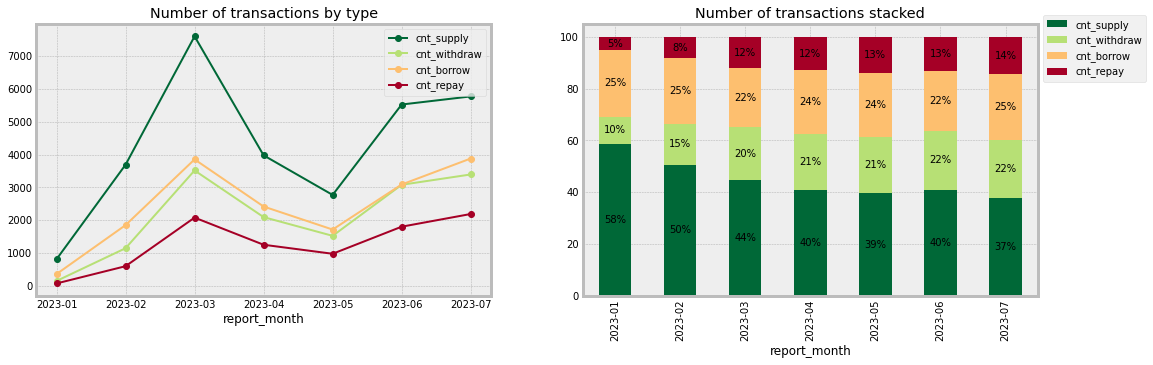

In [4]:
feats = [
 'cnt_supply',
 'cnt_withdraw',
 # 'cnt_liquidate_supply',
 'cnt_borrow',
 'cnt_repay',
 # 'cnt_liquidate_borrow',
]
title = 'Number of transactions'

# plotting
_, ax = plt.subplots(1,2, figsize = (16,5))
df_st = df_ag[feats]
_ = df_st.plot(ax = ax[0], title = title + ' by type', style = 'o-', cmap = 'RdYlGn_r')

df_st = 100*df_st.apply(lambda x: x/sum(x), axis = 1)
p = df_st.plot(ax = ax[1], kind = 'bar', stacked = True, legend = True, title = title + ' stacked', cmap = 'RdYlGn_r')
p.legend(bbox_to_anchor=(1., 1.05))
for c in p.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [f'{int(v.get_height())}%' if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    p.bar_label(c, labels=labels, label_type='center')

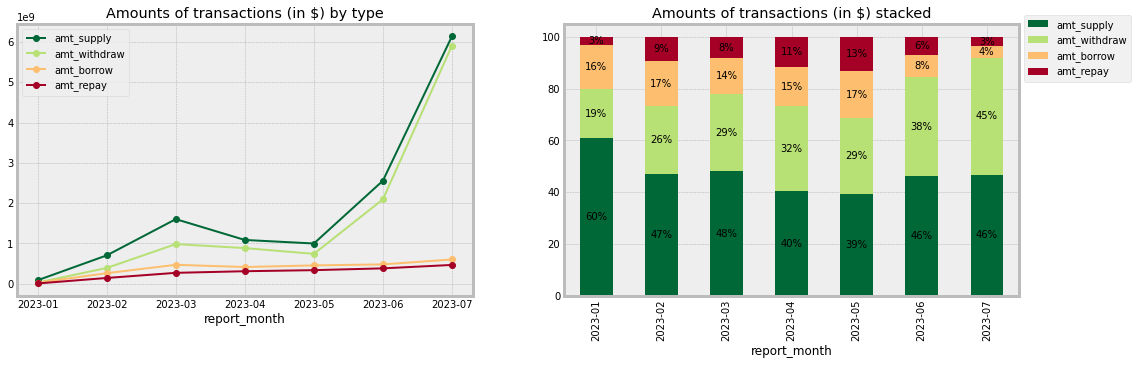

In [5]:
feats = [
 'amt_supply',
 'amt_withdraw',
 'amt_borrow',
 'amt_repay',
]
title = 'Amounts of transactions (in $)'

# plotting
_, ax = plt.subplots(1,2, figsize = (16,5))
df_st = df_ag[feats]
_ = df_st.plot(ax = ax[0], title = title + ' by type', style = 'o-', cmap = 'RdYlGn_r')

df_st = 100*df_st.apply(lambda x: x/sum(x), axis = 1)
p = df_st.plot(ax = ax[1], kind = 'bar', stacked = True, legend = True, title = title + ' stacked', cmap = 'RdYlGn_r')
p.legend(bbox_to_anchor=(1., 1.05))
for c in p.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [f'{int(v.get_height())}%' if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    p.bar_label(c, labels=labels, label_type='center')

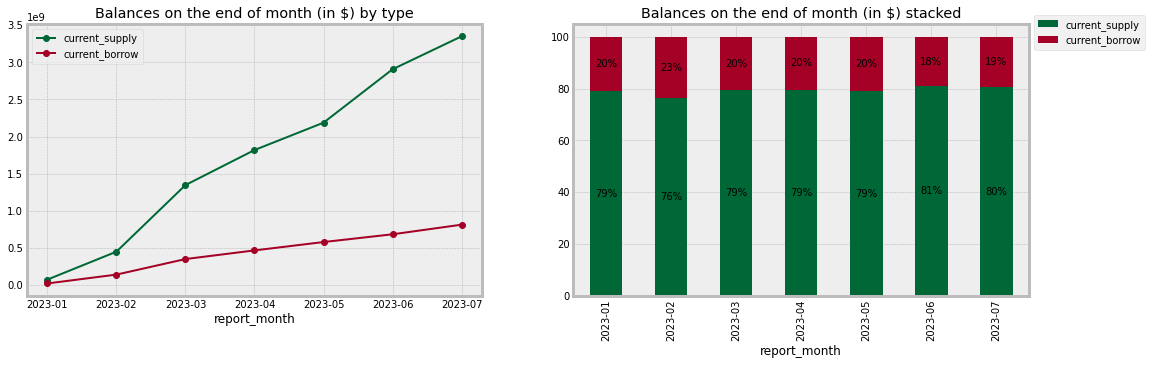

In [6]:
feats = [
 'current_supply',
 'current_borrow',
]
title = 'Balances on the end of month (in $)'

# plotting
_, ax = plt.subplots(1,2, figsize = (16,5))
df_st = df_ag[feats]
_ = df_st.plot(ax = ax[0], title = title + ' by type', style = 'o-', cmap = 'RdYlGn_r')

df_st = 100*df_st.apply(lambda x: x/sum(x), axis = 1)
p = df_st.plot(ax = ax[1], kind = 'bar', stacked = True, legend = True, title = title + ' stacked', cmap = 'RdYlGn_r')
p.legend(bbox_to_anchor=(1., 1.05))
for c in p.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [f'{int(v.get_height())}%' if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    p.bar_label(c, labels=labels, label_type='center')

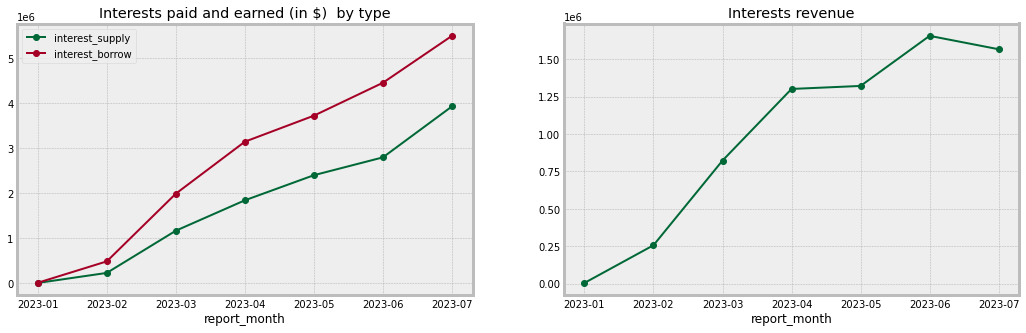

In [7]:
feats = [
 'interest_supply',
 'interest_borrow'
]
title = 'Interests paid and earned (in $) '

# plotting
_, ax = plt.subplots(1,2, figsize = (16,5))
df_st = df_ag[feats]
_ = df_st.plot(ax = ax[0], title = title + ' by type', style = 'o-', cmap = 'RdYlGn_r')

x = df_st.interest_borrow - df_st.interest_supply
p = x.plot(ax = ax[1], kind = 'line', title = 'Interests revenue', style = 'o-', cmap = 'RdYlGn_r')

### user lifecycles definition

In [8]:
list_month = list()
list_onb = list()
list_usage = list()
list_churn = list()

for r in sorted(df.report_month.unique()):
    list_month.append(r)
    f0 = df.report_month == r
    f1 = df.report_num == 1
    f2 = df.current_supply > 0
    
    list_onb.append(df[f0&f1].shape[0])
    list_usage.append(df[f0&~f1&f2].shape[0])

    f3 = df.report_month < r
    users_prev = set(df[f3].user.unique())
    users_now = set(df[f0&f2].user.unique())
    list_churn.append(len(users_prev.difference(users_now)))

df_st = pd.DataFrame({
    'report_month': list_month,
    'onboarding': list_onb,
    'usage': list_usage,
    'churn': list_churn,
}).set_index('report_month')
df_st

,onboarding,usage,churn
report_month,,,
2023-01,514,0,0
2023-02,1690,450,64
2023-03,3134,1854,350
2023-04,1328,4297,1041
2023-05,828,5382,1284
2023-06,1536,5947,1547
2023-07,1859,7111,1919


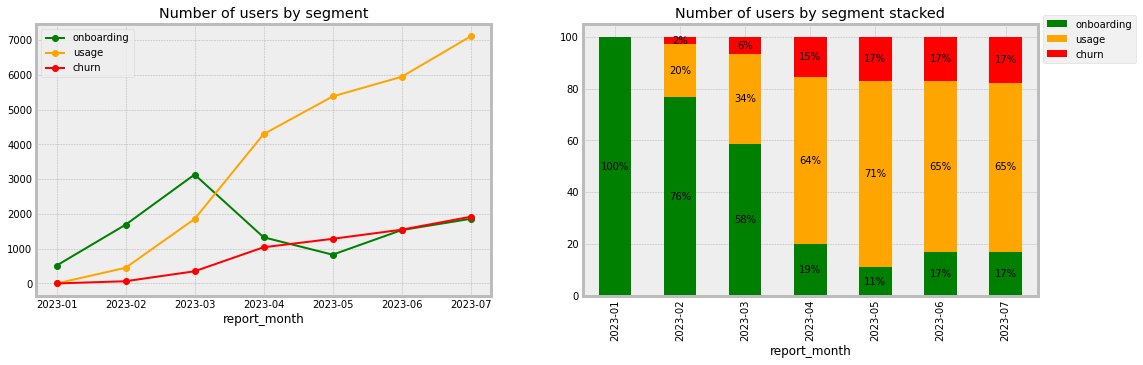

In [9]:
# plotting
colors = ['Green','Orange','Red']
_, ax = plt.subplots(1,2, figsize = (16,5))
title = 'Number of users by segment'
_ = df_st.plot(ax = ax[0], title = title, style = 'o-', color = colors)

df_st = 100*df_st.apply(lambda x: x/sum(x), axis = 1)
p = df_st.plot(ax = ax[1], kind = 'bar', stacked = True, legend = True, title = title + ' stacked', color = colors)
p.legend(bbox_to_anchor=(1., 1.05))
for c in p.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [f'{int(v.get_height())}%' if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    p.bar_label(c, labels=labels, label_type='center')